# Churn Analysis

**Dataset Information:**
Sample data contains credit card users those who are exited and not exited.

In [1]:
#importing the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
crecard_data=pd.read_csv('Churn_Modelling.csv')

In [3]:
crecard_data.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [4]:
crecard_data.shape

(10000, 14)

In [5]:
crecard_data.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [6]:
# Checking the data types of all the columns
crecard_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
#Here customerid an row number is not relevent when checking the descriptive statistics of numeric values. Also it has no relevence in checking the churn, so lets delete the column permanently.
crecard_data.drop('CustomerId',axis=1, inplace= True)
crecard_data.drop('RowNumber',axis=1, inplace= True)

# Check the descriptive statistics of numeric variables
crecard_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


HasCrCard, IsActiveMember and Exited are actually categorical hence the 25%-50%-75% distribution is not proper.

Average CreditScore	is 650.53 whereas 25% customers have credit score less than 96.65.

75% customers are aged below 44 years.

75% customers have tenure less than 7 years.

25% of the customer's balance is zero.

Average estimated salary of customer is 100090.24.

Maximum number of credit cards ownned by a cutromer is 4.


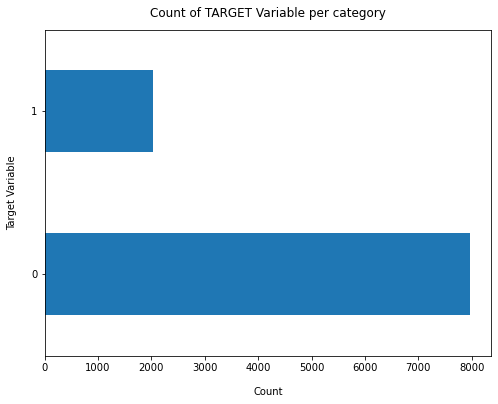

In [8]:
crecard_data['Exited'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [9]:
100*crecard_data['Exited'].value_counts()/len(crecard_data['Exited'])

0    79.63
1    20.37
Name: Exited, dtype: float64

In [10]:
crecard_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

* Data is highly imbalanced, ratio = 80:20<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [11]:
crecard_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


C:\Users\manuk\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


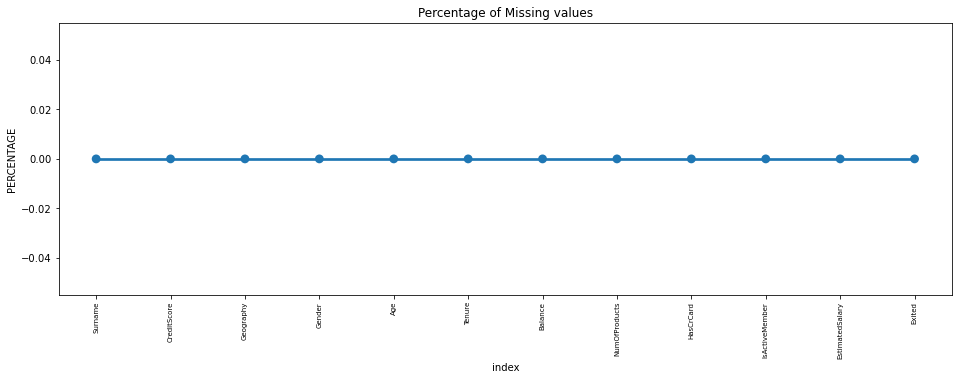

In [13]:
missing = pd.DataFrame((crecard_data.isnull().sum())*100/crecard_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Missing Data - Initial Intuition

* Here, we don't have any missing data.

**General Thumb Rules:**

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

# Data Cleaning

**1.** Reading the base data again for manipulating & processing

In [12]:
crecard_data1=pd.read_csv('Churn_Modelling.csv')

In [13]:
crecard_data1.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no any missing values in the given data.

**5.** Divide customers into bins based on tenure e.g. for tenure < 1 years: assign a tenure group if 0-1, for tenure between 1 to 2 Yrs, tenure group of 1-2; so on...

In [14]:
print(crecard_data1['Tenure'].max()) 

10


In [15]:
crecard_data1['tenure_group']=pd.cut(crecard_data1['Tenure'], 10)

In [16]:
crecard_data1['tenure_group'].value_counts()

(-0.01, 1.0]    1448
(1.0, 2.0]      1048
(6.0, 7.0]      1028
(7.0, 8.0]      1025
(4.0, 5.0]      1012
(2.0, 3.0]      1009
(3.0, 4.0]       989
(8.0, 9.0]       984
(5.0, 6.0]       967
(9.0, 10.0]      490
Name: tenure_group, dtype: int64

**6.** Remove columns not required for processing

In [17]:
crecard_data1.drop(columns= ['CustomerId','RowNumber',"Tenure",'Surname'], axis=1, inplace=True)
crecard_data1.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,tenure_group
0,619,France,Female,42,0.00,1,1,1,101348.88,1,"(1.0, 2.0]"
1,608,Spain,Female,41,83807.86,1,0,1,112542.58,0,"(-0.01, 1.0]"
2,502,France,Female,42,159660.80,3,1,0,113931.57,1,"(7.0, 8.0]"
3,699,France,Female,39,0.00,2,0,0,93826.63,0,"(-0.01, 1.0]"
4,850,Spain,Female,43,125510.82,1,1,1,79084.10,0,"(1.0, 2.0]"


# Data Exploration
**1. ** Plot distibution of individual predictors by Exited

**Univariate Analysis**

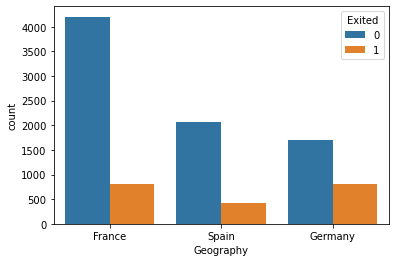

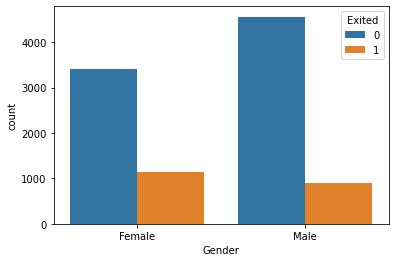

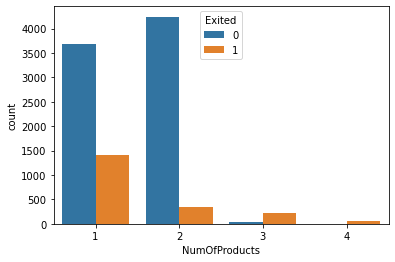

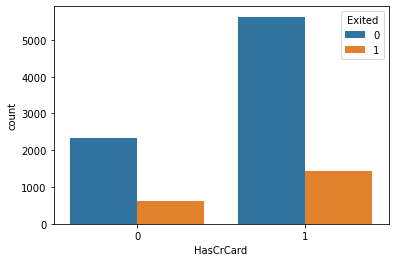

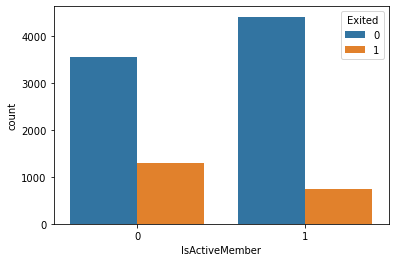

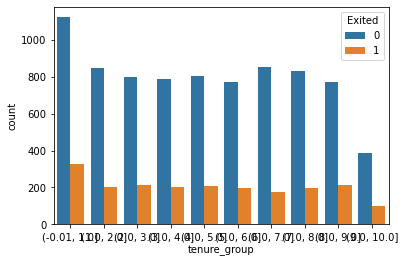

In [18]:
for i, predictor in enumerate(crecard_data1.drop(columns=['Exited',"Balance","EstimatedSalary","CreditScore",'Age'])):
    plt.figure(i)
    sns.countplot(data=crecard_data1, x=predictor, hue='Exited')

**2.** Convert all the categorical variables into dummy variables

In [19]:
crecard_data1_dummies = pd.get_dummies(crecard_data1)
crecard_data1_dummies.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,...,"tenure_group_(-0.01, 1.0]","tenure_group_(1.0, 2.0]","tenure_group_(2.0, 3.0]","tenure_group_(3.0, 4.0]","tenure_group_(4.0, 5.0]","tenure_group_(5.0, 6.0]","tenure_group_(6.0, 7.0]","tenure_group_(7.0, 8.0]","tenure_group_(8.0, 9.0]","tenure_group_(9.0, 10.0]"
0,619,42,0.00,1,1,1,101348.88,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,608,41,83807.86,1,0,1,112542.58,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,502,42,159660.80,3,1,0,113931.57,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,699,39,0.00,2,0,0,93826.63,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,0,...,0,1,0,0,0,0,0,0,0,0


**3.**  Exited Vs Credit Score, Estimated Salary, Balance

i) Exited Vs Credit Score

Text(0.5, 1.0, 'CreditScore Vs Exited')

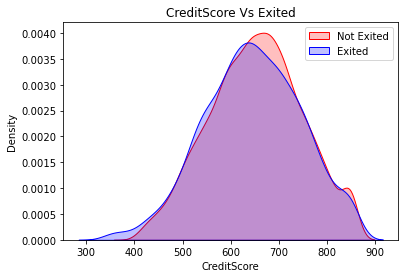

In [20]:
CreSc = sns.kdeplot(crecard_data1_dummies.CreditScore[(crecard_data1_dummies["Exited"] == 0) ],
                color="Red", shade = True)
CreSc = sns.kdeplot(crecard_data1_dummies.CreditScore[(crecard_data1_dummies["Exited"] == 1) ],
                ax =CreSc, color="Blue", shade= True)
CreSc.legend(["Not Exited","Exited"],loc='upper right')
CreSc.set_ylabel('Density')
CreSc.set_xlabel('CreditScore')
CreSc.set_title('CreditScore Vs Exited')

**Insight:** Exiting is high when creditscore is near average. similarly for not exiting ones also high near average. So we are not able to reach at any conclusions.

ii) Exited Vs EstimatedSalary

Text(0.5, 1.0, 'EstimatedSalary Vs Exited')

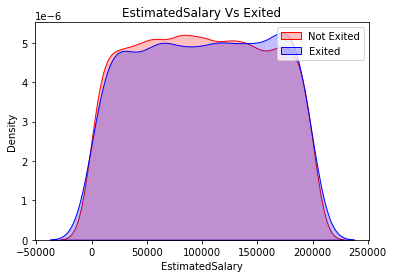

In [23]:
Est = sns.kdeplot(crecard_data1_dummies.EstimatedSalary[(crecard_data1_dummies["Exited"] == 0) ],
                color="Red", shade = True)
Est = sns.kdeplot(crecard_data1_dummies.EstimatedSalary[(crecard_data1_dummies["Exited"] == 1) ],
                ax =Est, color="Blue", shade= True)
Est.legend(["Not Exited","Exited"],loc='upper right')
Est.set_ylabel('Density')
Est.set_xlabel('EstimatedSalary')
Est.set_title('EstimatedSalary Vs Exited')

Here also both exited and not exited is showing approximately same distribution with respect to Estimatedsalary. So we cannot arrive at a conclusion. Or we can say that there is no paticular relationship between exiting and estimated salary.

iii) Exited Vs Balance

Text(0.5, 1.0, 'Balance Vs Exited')

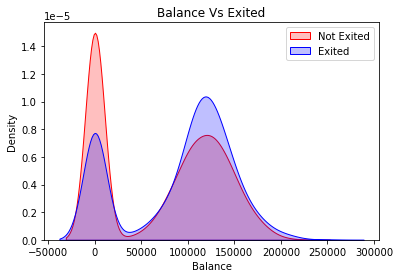

In [24]:
Blnc = sns.kdeplot(crecard_data1_dummies.Balance[(crecard_data1_dummies["Exited"] == 0) ],
                color="Red", shade = True)
Blnc = sns.kdeplot(crecard_data1_dummies.Balance[(crecard_data1_dummies["Exited"] == 1) ],
                ax =Blnc, color="Blue", shade= True)
Blnc.legend(["Not Exited","Exited"],loc='upper right')
Blnc.set_ylabel('Density')
Blnc.set_xlabel('Balance')
Blnc.set_title('Balance Vs Exited')

**Insight:** Customers having high balance are exiting highly.

iv) Exited Vs Age

Text(0.5, 1.0, 'Age Vs Exited')

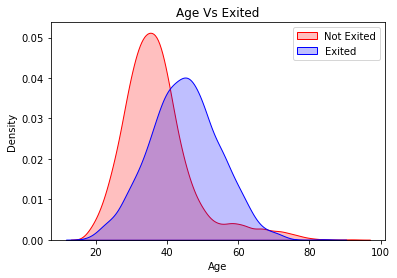

In [25]:
AG = sns.kdeplot(crecard_data1_dummies.Age[(crecard_data1_dummies["Exited"] == 0) ],
                color="Red", shade = True)
AG  = sns.kdeplot(crecard_data1_dummies.Age[(crecard_data1_dummies["Exited"] == 1) ],
                ax =AG , color="Blue", shade= True)
AG.legend(["Not Exited","Exited"],loc='upper right')
AG.set_ylabel('Density')
AG.set_xlabel('Age')
AG.set_title('Age Vs Exited')

**Insights:** Customers in age category (40-65) is showing tendency to exit.

In [26]:
crecard_data1_dummies['Age_group']=pd.cut(crecard_data1_dummies['Age'], range(17,93,15))
crecard_data1_dummies['Age_group'].value_counts()

(32, 47]    5500
(17, 32]    2790
(47, 62]    1351
(62, 77]     335
(77, 92]      24
Name: Age_group, dtype: int64

In [27]:
crecard_data1_dummies.drop(columns= ['Age'], axis=1, inplace=True)
crecard_data1_dummies2 = pd.get_dummies(crecard_data1_dummies)
crecard_data1_dummies2.head()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,...,"tenure_group_(5.0, 6.0]","tenure_group_(6.0, 7.0]","tenure_group_(7.0, 8.0]","tenure_group_(8.0, 9.0]","tenure_group_(9.0, 10.0]","Age_group_(17, 32]","Age_group_(32, 47]","Age_group_(47, 62]","Age_group_(62, 77]","Age_group_(77, 92]"
0,619,0.00,1,1,1,101348.88,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,608,83807.86,1,0,1,112542.58,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,502,159660.80,3,1,0,113931.57,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,699,0.00,2,0,0,93826.63,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,850,125510.82,1,1,1,79084.10,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

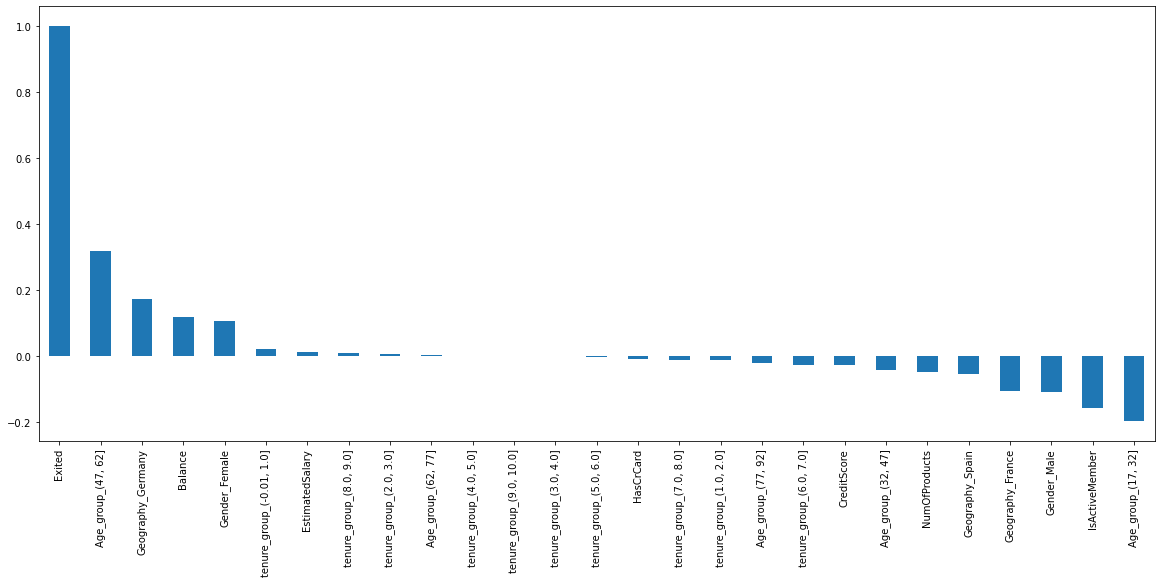

In [28]:
plt.figure(figsize=(20,8))
crecard_data1_dummies2.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight:**

High exiting tendency is seen in case of Age group (47,62], customers in Germany, customers with balance and female customers and also customers with tenure between 0 & 1 is also showing a tendency to exit.

LOW exiting tendecy is seen in case of Age group(17,32], Active members, male customers and customers in France.
Factors like Estimated salary, Credit score and Has card have alomost NO impact on Exit.

This is also evident from the Heatmap below

<AxesSubplot:>

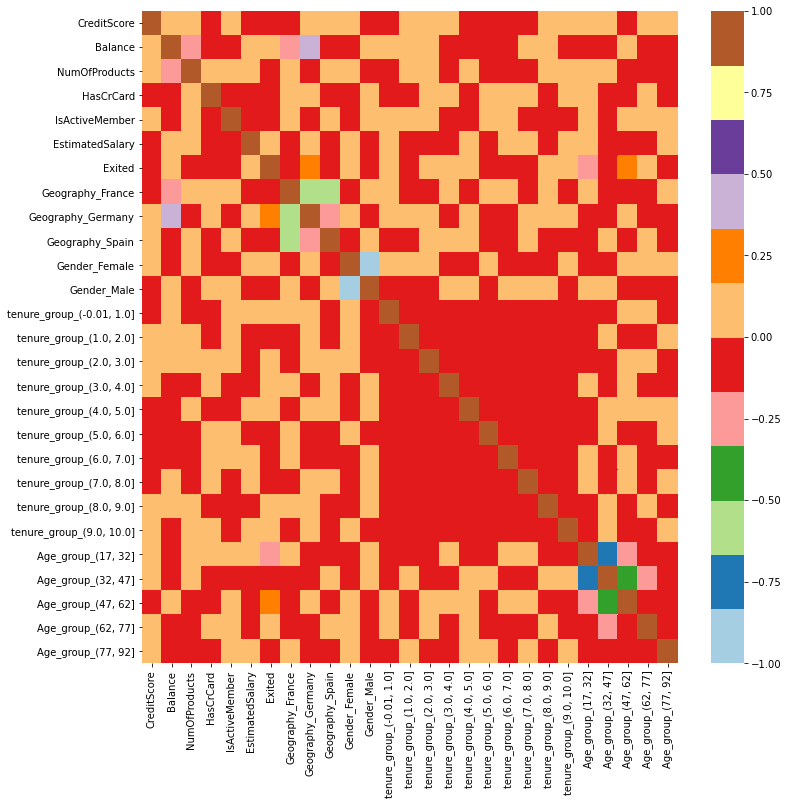

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(crecard_data1_dummies2.corr(), cmap="Paired")

**Bivariate Analysis**

In [30]:
new_df1_target0=crecard_data1.loc[crecard_data1["Exited"]==0]
new_df1_target1=crecard_data1.loc[crecard_data1["Exited"]==1]

In [31]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

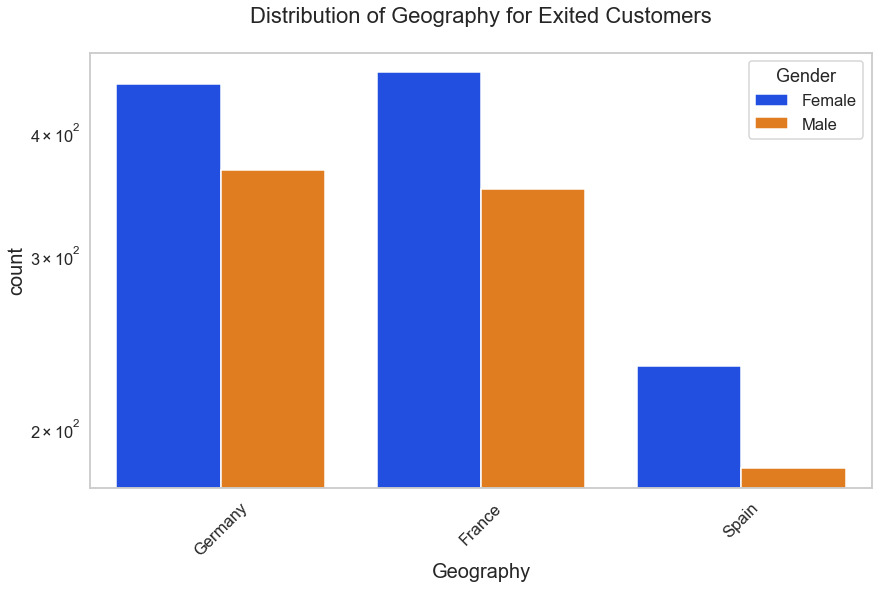

In [32]:
uniplot(new_df1_target1,col='Geography',title='Distribution of Geography for Exited Customers',hue='Gender')

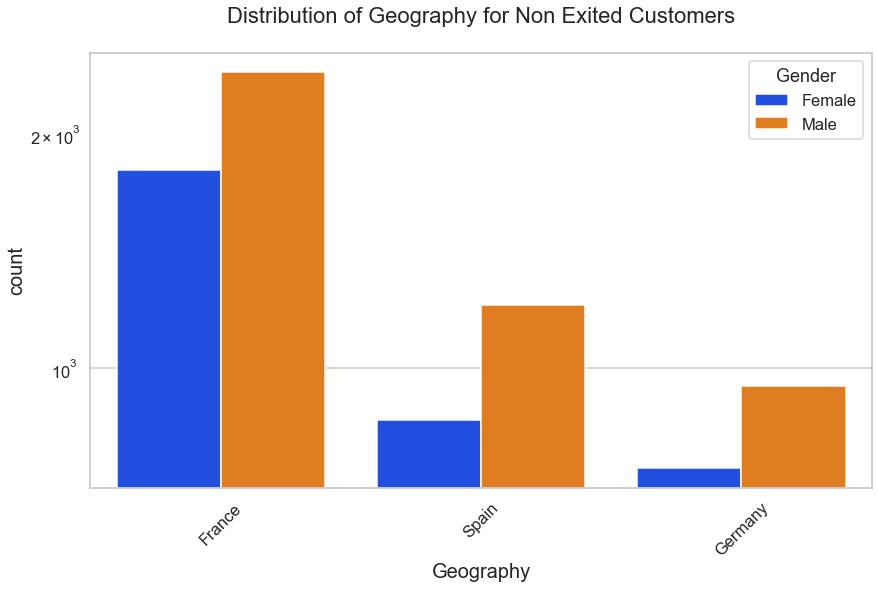

In [33]:
uniplot(new_df1_target0,col='Geography',title='Distribution of Geography for Non Exited Customers',hue='Gender')

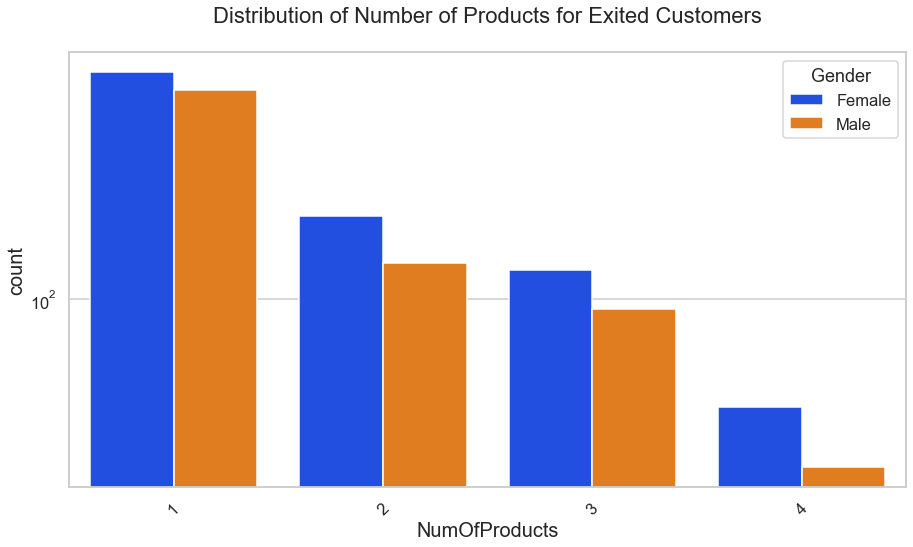

In [34]:
uniplot(new_df1_target1,col='NumOfProducts',title='Distribution of Number of Products for Exited Customers',hue='Gender')

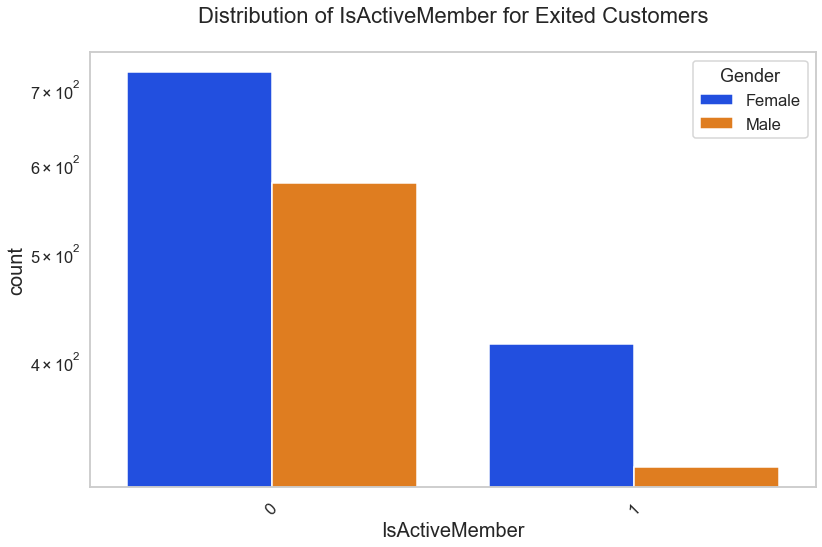

In [35]:
uniplot(new_df1_target1,col='IsActiveMember',title='Distribution of IsActiveMember for Exited Customers',hue='Gender')

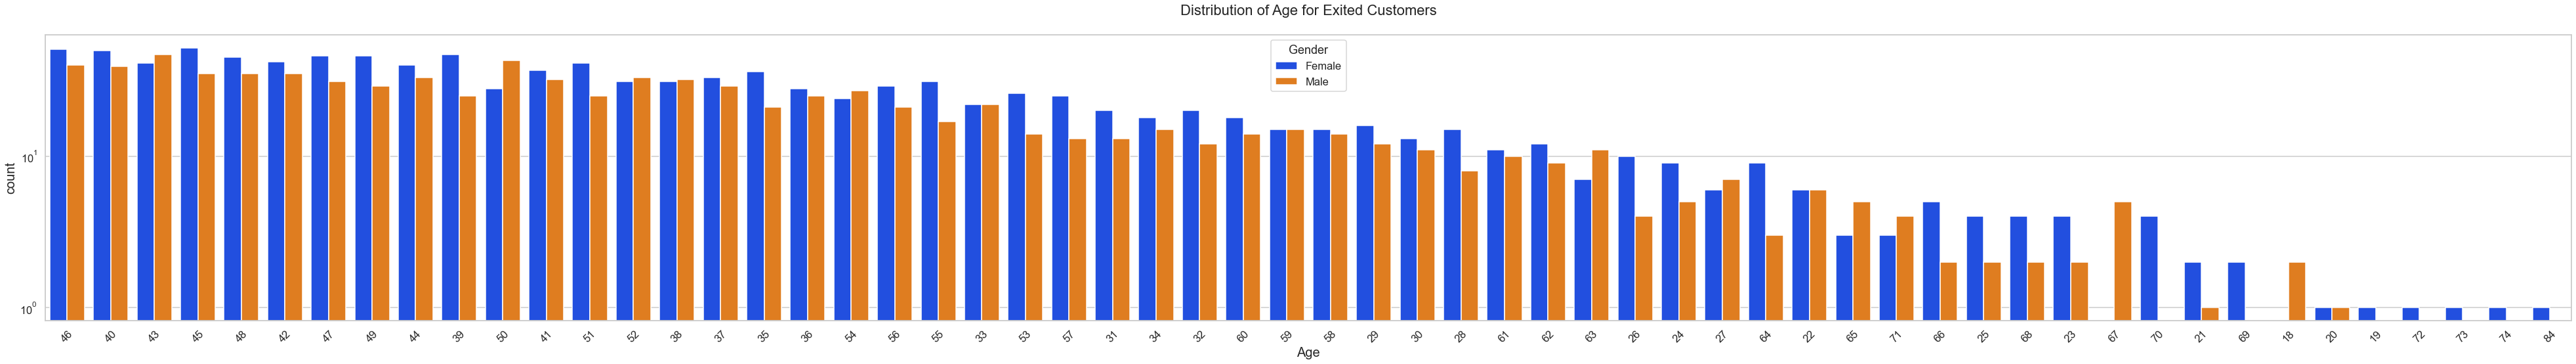

In [37]:
uniplot(new_df1_target1,col='Age',title='Distribution of Age for Exited Customers',hue='Gender')

# Conclusions:

**These are some of the quick insights from this excercise:**



  1.Customers from Germany are showing high tendency to quit. In France,when compared with number of customers retaining and          exiting customers is less. 
  
  2.Customers having less number of products are the exiting ones.
  
  3.Non active members are high churners.
  
  4.Customers within age group 35-60 are showing high tendency to quit.
  
  5.When we analyse the above results we can clearly see that the female customers are most exiting ones when compared to male     customers.